## 타이타닉에서 살아남기
### sklearn의 로지스틱 회귀 라이브러리를 이용하여 타이타닉 실제 승객의 데이터를 학습시켜보고, 직접 다른 데이터를 넣어 생존자를 예측해보자.

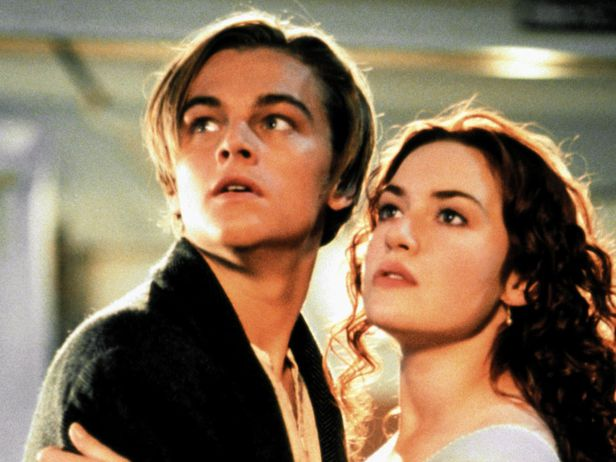


In [1]:
import pandas as pd
import numpy as np

#사이킷런의 로지스틱 회귀 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [3]:
# null 값 확인
data.isna().sum() #결측치 여부확인

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [4]:
# 생존 여부에 대한 데이터 분리(label)
label = data['Survived']

# 모델 훈련 시 입력 데이터 => 기존 데이터에서 삭제시켜주기
data.drop(labels = ['Name','Survived','Fare'],axis=1,inplace=True)

# 성별 데이터를 숫자로 변환 (남자-0, 여자-1)
data['Sex'] = data['Sex'].map({'male':0,'female':1})
data 

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0
...,...,...,...,...,...
882,2,0,27.0,0,0
883,1,1,19.0,0,0
884,3,1,7.0,1,2
885,1,0,26.0,0,0


In [10]:
#train 데이터와 test 데이터 분리
train_input, test_input,train_label, test_label =train_test_split(data,label,random_state=42)

## 모델 생성 및 학습

In [11]:
model = LogisticRegression() #sklearn에서 제공

#모델 훈련
model.fit(train_input,train_label) # 모두 train set으로 훈련

#예측 확인
print(model.predict(test_input)) 

# 출력 값에서 0이 사망자, 1이 생존자

[0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0]


In [12]:
#정확도
print(model.score(train_input, train_label))

#가중치(W) 확인 가중치가 클수록 생존확률에 영향을 많이 준다.
print(data.head(0))
print(model.coef_)

# 절댓값을 적용해 가중치 크기를 확인 후, 어떤 것이 생존 확률에 가장 큰 영향을 미치는지 확인
# => 성별 -> 등급 순

0.8090225563909774
Empty DataFrame
Columns: [Pclass, Sex, Age, Siblings/Spouses Aboard, Parents/Children Aboard]
Index: []
[[-1.22033116  2.72464597 -0.04117579 -0.38049401 -0.05352014]]


### 임의의 값 넣어보기
#### Jack : 남성,20세,3등석
#### Rose : 여성,17세,1등석

#### 데이터 순서 [등석, 성별, 나이, 형제 수, 부모 수]

In [14]:
# Jack
pred =model.predict([[3,0,20,0,0]])

if(pred[0] == 0):
    print('AI : 사망하실 것으로 예측됩니다.\n')
else:
    print('AI : 생존하실 것으로 예측됩니다.\n')

print('생존확률 / 사망확률 : {}'.format(model.predict_proba([[1,1,24,2,2]])))

AI : 사망하실 것으로 예측됩니다.

생존확률 / 사망확률 : [[0.09304854 0.90695146]]


In [15]:
# Rose
pred =model.predict([[1,1,17,0,2]])

if(pred[0] == 0):
    print('AI : 사망하실 것으로 예측됩니다.\n')
else:
    print('AI : 생존하실 것으로 예측됩니다.\n')

print('생존확률 / 사망확률 : {}'.format(model.predict_proba([[1,1,24,2,2]])))

AI : 생존하실 것으로 예측됩니다.

생존확률 / 사망확률 : [[0.09304854 0.90695146]]


In [16]:
#나
pred =model.predict([[1,1,20,1,2]])

if(pred[0] == 0):
    print('AI : 사망하실 것으로 예측됩니다.\n')
else:
    print('AI : 생존하실 것으로 예측됩니다.\n')

print('생존확률 / 사망확률 : {}'.format(model.predict_proba([[1,1,24,2,2]])))

AI : 생존하실 것으로 예측됩니다.

생존확률 / 사망확률 : [[0.09304854 0.90695146]]
